In [1]:
from plot import Plot, PointsCollection, LinesCollection

In [2]:
def testTime(n):
    test = [(uniform(0,1000), uniform(0,1000)) for _ in range(n)]
    points = set()
    for x, y in test:
        points.add(Point(x, y))

    voronoi = Voronoi(points)
    start = time()
    voronoi.solve()
    return time() - start

def testTimeKtimes(n, k):
    res = 0
    for _ in range(k):
        res += testTime(n)
    print(res)
    return res / k

In [3]:
from voronoiFortunemethod import Voronoi
from dataTypes import Point
from random import uniform
from time import time

lines = []
p = []
howManyTests = 11
results = []
prev = None
n = 50
prev = None

for i in range(howManyTests):
    n *= 2
    n = int(n)
    
    t = testTimeKtimes(n, 10)
    results.append((n, t))
    
    if prev is None:
        prev = (n, t)

    lines.append((prev, (n, t)))
    p.append((n, t))
    prev = (n, t)

def printResults(results):
    for n, t in results:
        print("amountOfPoints:", n)
        print("time:", t)
        print()

0.11404085159301758
0.3460085391998291
0.8510909080505371
1.8981940746307373
3.305274724960327
7.792036056518555
16.534916877746582
35.65161371231079
73.96824169158936
146.23574447631836
326.7487118244171


<IPython.core.display.Javascript object>


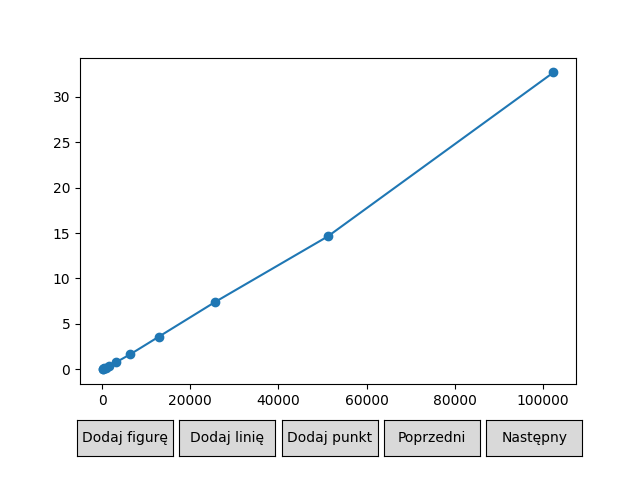

In [4]:
%matplotlib notebook
plot = Plot(lines = [LinesCollection(lines)], points = [PointsCollection(p)])
plot.draw(True)

In [5]:
from pprint import pprint

pprint(results)

[(100, 0.011404085159301757),
 (200, 0.03460085391998291),
 (400, 0.08510909080505372),
 (800, 0.18981940746307374),
 (1600, 0.3305274724960327),
 (3200, 0.7792036056518554),
 (6400, 1.6534916877746582),
 (12800, 3.565161371231079),
 (25600, 7.396824169158935),
 (51200, 14.623574447631835),
 (102400, 32.67487118244171)]
